# Homework 1 (HW1)

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways; 
- Create meaningful visualizations to analyze the data;

---

## Important Dates

- Homework release: Fri 14 Oct 2022
- **Homework due**: Sat 29 Oct 2022, 23:59
- Grade release: Mon 07 Nov 2022

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

In this homework, we will analyze data from A/B tests of headlines conducted by Upworthy from January 2013 to April 2015 to study whether the language used in the headline determines the number of people that will read the associated news piece. The homework contains four tasks: in task 1, we will process the data; in task 2, we will extract meaningful signals from the data; in task 3, we will test whether the language of headlines impacts their success; and in task 4, we will explore the heterogeneity of this effects (e.g., does it vary through time?).


### **What is an A/B test?** 
A/B tests are experiments that compare two scenarios (e.g., scenario A vs. scenario B). 
They test subjects' responses to each of the variants to determine which is more effective ([read more about A/B tests on Wikipedia](https://en.wikipedia.org/wiki/A/B_testing)). 
A/B tests allow us to draw conclusions about the different scenarios by randomizing exposure to them, e.g., one could flip a coin and assign a user to scenario A if it lands heads and to B if it lands tails. 
Since exposure is randomized, we can be confident that the scenarios are the sole explanation for statistically significant differences in subjects' responses (if they exist). 
In theory, A/B testing refers to an experiment that compares two scenarios; however, in practice, the term is also used when we compare multiple scenarios (e.g., A vs. B vs. C), although the more precise terminology would be to call such an experiment a "multinomial test."

### **How were A/B tests used by Upworthy?** 
Upworthy used A/B testing to increase news readership, conducting experiments for each published news piece. 
In each experiment, they created multiple "packages" of stimuli, varying headlines, images, excerpts, and ledes for the same news piece. 
Different "packages" were shown on their (now defunct) website to engage users with the news pieces they produced. Upworthy found "the best" package by conducting A/B tests, showing different packages to different users, and measuring how often users clicked on each version. 
Below, we show three "packages" used by Upworthy in an experiment, each with a different headline for the same news piece. 
Upworthy randomized users that visited their website saw one of the three versions of the headline below. Then, they measured the percentage of times users in each scenario clicked to read the news. 
The headline with the highest percentage of clicks per view (click through rate) was then declared the "winner" and became the default for all visitors.

![Example A/B test](example.png)

 ### **Where does this data come from?** 
 
 From a paper [1].

[1] Matias, J.N., Munger, K., Le Quere, M.A. et al. The Upworthy Research Archive, a time series of 32,487 experiments in U.S. media. Sci Data 8, 195 (2021). https://doi.org/10.1038/s41597-021-00934-7

### **Where can I find this data?**  

You can find it in the `/data/` folder.

### **Terminology**

- **News piece:** A news article. In the dataset considered, these were all produced by Upworthy.
- **Package:** The set of visual stimuli inviting the user to read an article. The figure above shows a package with a headline and an image. At times, there was an excerpt of the article also shown in the package and/or the lede, i.e., ["the introductory section of a news story that is intended to entice the reader to read the full story."](https://www.merriam-webster.com/words-at-play/bury-the-lede-versus-lead#:~:text=In%20journalism%2C%20the%20lede%20refers,machines%20began%20disappearing%20from%20newsrooms.)
- **Experiment:** Each experiment is an A/B test (or multinomial test, to be more precise) comparing how users reacted to different "packages." Experiments measured two things: 1) how many users were shown each package; and 2) how many individuals clicked each package.

### **Data description**

| Column name          | Description                                                                                                                                                                                       |   |   |   |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| created_at           | Time the package was created (timezone unknown)                                                                                                                                                   |   |   |   |
| test_week            | Week the package was created, a variable constructed by the archive creators for stratified random sampling                                                                                       |   |   |   |
| clickability_test_id | The test ID. Viewers were randomly assigned to packages with the same test ID                                                                                                                     |   |   |   |
| impressions          | The number of viewers who were assigned to this package. The total number of participants for a given test is the sum of impressions for all packages that share the same clickability_test_id    |   |   |   |
| headline             | The headline being tested                                                                                                                                                                         |   |   |   |
| eyecatcher_id        | Image ID. Image files are not available. Packages that shared the same image have the same eyecatcher_id                                                                                          |   |   |   |
| clicks               | The number of viewers (impressions) that clicked on the package. The clickrate for a given package is the number of clicks divided by the number of impressions                                   |   |   |   |
| excerpt              | Article excerpt                                                                                                                                                                                   |   |   |   |
| lede                 | The opening sentence or paragraph of the story                                                                                                                                                    |   |   |   |
| slug                 | Internal name for the web address                                                                                                                                                                 |   |   |   |
| share_text           | Summary for display on social media when the article is shared. This was not shown in tests, since tests were conducted on the Upworthy website                                                   |   |   |   |
| square               | When used, part of the same social media sharing suggestion as the share text                                                                                                                     |   |   |   |
| significance         | NOT an estimate of statistical significance; a complex, inconsistent calculation that compared the clicks on a package to the clicks on all previous packages that were fielded on the same pages |   |   |   |
| first_place          | Along with significance, shown to editors to guide decisions about what test to choose                                                                                                            |   |   |   |
| winner               | Whether a package was selected by editors to be used on the Upworthy site after the test                                                                                                          |   |   |   |
| updated_at           | The last time the package was updated in the Upworthy system                                                                                                                                      |   |   |   |


In [1]:
# import used libraries
import pandas as pd                        # pandas for data analysis
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt            # matplotlib for data visualisation
import numpy as np                         # numpy for maths
from scipy import stats                    # scipy.stats for ttests
import pingouin as pg                      # pingouin for more developped ttests

## Task 1: Getting familiar with the data

Your first task is to conduct initial analyses to understand the data and process it in a way that will allow us to more easily answer our key question: *how does the language of a headline determine its success?*

1.1 Load the data into memory using pandas and print the first lines to get a sense of it.

1.2 Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (`clickability_test_id` column). 
Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment. 
Last, plot the distribution of packages per experiment with a visualization of your choice.

1.3 A common way to measure success in online A/B tests is what is called "the clickthrough rate."
Given that often A/B tests are created to find what engages users (here, "packages" of headlines, images, etc), we would expect that a "good" package makes people click often. 
Create a column named `ctr` by dividing the number of clicks a package received (`clicks` column) by the number of impressions it received (`impressions` column).

1.4 Packages varied any combination of the headline (`headline` column), the excerpt (`excerpt`), the first sentence of the article (`lede`), and the image that illustrates the news piece (`eyecatcher_id`, a hash per image). 
But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present. 
Print the length of this new dataframe and how many experiments were discarded in the filtering process.

1.5 For comparison, repeat the procedure described in **T1.4** with the `eyecatcher_id` column, i.e., create a dataframe considering only experiments that vary the image. 
Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.

1.6 **Discuss:** Considering the answers to questions **T1.4** and **T1.5**, what can we say about the different versions of the news tested by Upworthy?

1.7 For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece. 
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`. 
- there are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`). 
- the columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first columns of your newly created dataframe, as well as its length.
-  the columns where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  the column `date_created` contains the date when the news version with the highest clickthrough rate was created.

1.8 To get a sense of the impact of headline change, measure the average difference per pair between the most clicked-through (`ctr1`) and the least clicked-through headline (`ctr2`), as well as the average clickthrough rate for the least clicked through headline (`ctr2`). 

1.9 **Discuss:** Considering your answer to **T1.8**, and assuming the average differences in clickthrough rates between pairs are statistically significant, do you think that headlines are impactful in the news business? Justify with the data.

In [2]:
# 1.1

upworthy = pd.read_csv('data/upworthy.csv.gz') # import dataset compressed in a gzip fil
upworthy.head(5)                               # display the first lines of the dataframe (5 default)

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446


The total amount of packages is 20603.
The total amount of different experiences is 4822.
There is an avarage of 4.27 packages per experiment.


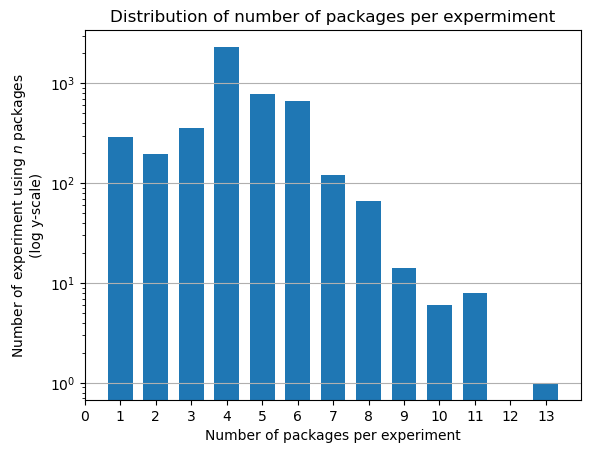

In [3]:
# 1.2

# The total amount of packages is only the number of samples in our dataset
# We can check the length of the dataset :
nb_packages_total = len(upworthy)
print("The total amount of packages is %s." %nb_packages_total)

# The total amount of eperiments is the number of different test_id in the column 'clickability_test_id'
# We can use the groupby function
nb_experiment_total = len(upworthy.groupby('clickability_test_id')) 
print("The total amount of different experiences is %s." %nb_experiment_total)

# The avarage number of package per experiment is nb_package_total / nb_experiment_total :
print("There is an avarage of %s packages per experiment." %round(nb_packages_total/nb_experiment_total,2))

# For each experiment, we want to check how many packages has been used
# We can simply use the function value_counts which counts the number of same values under a column:
pack_per_experiment = upworthy['clickability_test_id'].value_counts()

# We use a histogram to display the distribution of used packages per experiment
# We use a logarithmic y-scale as some values are very high and some very low
pack_per_experiment.plot.hist(title="Distribution of number of packages per expermiment",
                              bins=13, align='left', rwidth=0.7, log=True)
plt.grid(axis='y')
plt.xticks(range(14))
plt.xlabel('Number of packages per experiment')
plt.ylabel('Number of experiment using $n$ packages \n(log y-scale)')
plt.show()

In [4]:
# 1.3

# The clickthrough rate (ctr) of a package is its number of clicks divided by the number of impressions it recieved
upworthy['ctr'] = upworthy['clicks'] / upworthy['impressions']  # We create a new column in our dataset
upworthy[['created_at', 'clickability_test_id',                 # We diplay only interesting columns
          'impressions', 'clicks', 'ctr']].head()  

,created_at,clickability_test_id,impressions,clicks,ctr
0,2014-11-20 06:43:16.005,546d88fb84ad38b2ce000024,3052,150,0.049148
1,2014-11-20 06:54:36.335,546d902c26714c6c44000039,3526,90,0.025525
2,2014-11-20 06:54:57.878,546d902c26714c6c44000039,3506,120,0.034227
3,2014-11-20 06:55:07.212,546d902c26714c6c44000039,3380,98,0.028994
4,2014-11-20 06:55:20.347,546d902c26714c6c44000039,3465,75,0.021645


In [5]:
# 1.4

# The way we are going to drop experiences having only one headline is by going through each experiment,
# ... checking the number of different headlines, and there is only one headline, then we get rid of the experiment
# If an experiment has packages sharing the same headline as follows {pck1:A, pck2:A, pck3:B}, we still want all
# ... packages from the experiment

# Creating a copy of the total dataframe, on which we are going to filter out the experiments
upworthy_diff_headline = upworthy.copy()

# Creating a list of each individual experiment 
list_experiments = pack_per_experiment.index

# Going through each experiment
for exp in list_experiments:
    # Grouping the packages by headlines and checking the length
    nb_diff_headlines = len(upworthy[upworthy['clickability_test_id'] == exp].groupby('headline'))
    if nb_diff_headlines <= 1 :
        # If the length is one, then we drop the experiment 
        upworthy_diff_headline = upworthy_diff_headline[upworthy_diff_headline['clickability_test_id']!=exp]

# The number of remaining packages is the length of the new dataframe
nb_packages_diff_headline = len(upworthy_diff_headline)           
print("There is %s packages with different headlines." %nb_packages_diff_headline)

# The number of discarded experiments is the number of experiments in the whole dataset minus the number of
# ... experiments in our filtered data set
nb_experiment_diff_headline = len(upworthy_diff_headline.groupby('clickability_test_id'))  
print("There has been %s experiment discarded." %(nb_experiment_total-nb_experiment_diff_headline))

There is 11600 packages with different headlines.
There has been 2236 experiment discarded.


In [6]:
# 1.5

# This cell is a copy-paste of the previous one, doing the method for the eyecatcher_id instead of the headline

# Creating a copy of the total dataframe, on which we are going to filter out the experiments
upworthy_diff_eyecatcher_id = upworthy.copy()

# Going through each experiment
for exp in list_experiments:
    # Grouping the packages by eyecatcher_id and checking the length
    nb_diff_eyecatcher_id = len(upworthy[upworthy['clickability_test_id'] == exp].groupby('eyecatcher_id'))
    if nb_diff_eyecatcher_id <= 1 :
        # If the length is one, then we drop the experiment 
        upworthy_diff_eyecatcher_id = upworthy_diff_eyecatcher_id[upworthy_diff_eyecatcher_id['clickability_test_id']!=exp]

# The number of remaining packages is the length of the new dataframe
nb_packages_diff_eyecatcher_id = len(upworthy_diff_eyecatcher_id)           
print("There is %s packages with different eyecatcher_id." %nb_packages_diff_eyecatcher_id)

# The number of discarded experiments is the number of experiments in the whole dataset minus the number of
# ... experiments in our filtered data set
nb_experiment_diff_eyecatcher_id = len(upworthy_diff_eyecatcher_id.groupby('clickability_test_id'))  
print("There has been %s experiment discarded." %(nb_experiment_total-nb_experiment_diff_eyecatcher_id))

There is 7930 packages with different eyecatcher_id.
There has been 3108 experiment discarded.


___
###  1.6 
In the two previous questions, we observe that:
- there are more packages with different headlines than packages with different images (11600 vs 7930: ratio of 1,46 times more variety in headlines than images).
- there are fewer discarded experiments when testing different headlines than when testing different images (2236 vs 3108).

This means that upworthy tends to test the impact of different headlines more than they test the impact of different images.
___

In [7]:
# 1.7

# To create our AB_test comparaison dataframe, we can re-use the dataframe obtained in 1.4 where we have kept
# ... only experiments with more than one different headline. We merge rows have the same clickability_test_id,
# ... lede, eyecatcher_id and excerpt to be sure that only the headline has an effect on the clickthrough rate.
# Then we filter out the pairs where the clicktrough rate 1 is lower than the clickthrough rate 2.

# Merging the previous dataframe to obtain pairs of packages
pairs = upworthy_diff_headline.merge(upworthy_diff_headline,
                                     on=['eyecatcher_id', 'lede', 'excerpt','clickability_test_id'],
                                     suffixes=('1','2'))

# Filtering out rows to make sure ctr1>ctr2 and keeping columns in which we are interested
AB_test = pairs[(pairs['ctr1']>pairs['ctr2'])][['created_at1','headline1','headline2','ctr1','ctr2']]
AB_test.rename(columns={'created_at1':'date_created'}, inplace=True)

# The number of created pairs is the length of our comparaison dataframe
print("%s pairs have been created to compare the clickrates for different headlines." %len(AB_test))

# Display the first rows of the comparaison dataframe (default 5)
AB_test.head(15)

17727 pairs have been created to compare the clickrates for different headlines.


,date_created,headline1,headline2,ctr1,ctr2
2,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,0.011101,0.005868
4,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",0.011101,0.009726
6,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,0.012689,0.011101
8,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,He Sat Them Down And Told Them About An Immine...,0.012689,0.005868
10,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,"They May Not Be The Most Handsome Dudes, But T...",0.012689,0.009726
11,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,He Showed Them Some Slides That Freaked Them O...,0.012689,0.011568
18,2014-11-20 15:13:36.266,"The 3 Of Them Needed To See It In Person, And ...",What They Learned From The Scientist Was Terri...,0.013795,0.011101
19,2014-11-20 15:13:36.266,"The 3 Of Them Needed To See It In Person, And ...",A Science Guy Helps 3 Dudes From America Under...,0.013795,0.012689
20,2014-11-20 15:13:36.266,"The 3 Of Them Needed To See It In Person, And ...",He Sat Them Down And Told Them About An Immine...,0.013795,0.005868
22,2014-11-20 15:13:36.266,"The 3 Of Them Needed To See It In Person, And ...","They May Not Be The Most Handsome Dudes, But T...",0.013795,0.009726


In [8]:
# 1.8

# We compute and display the avarage difference of clickthrough rates in the pairs (ctr1 - ctr2)
ctr_diff_mean = (AB_test.ctr1 - AB_test.ctr2).mean()
print("The avarage difference between ctr1 and ctr2 is %s" %round(ctr_diff_mean,6))

# We compute and display the avarage value of the lowest clickthrough rate (ctr2)
ctr2_mean = AB_test.ctr2.mean()
print("The avarage lowest clickrate ctr2 is            %s" %round(ctr2_mean,6))

The avarage difference between ctr1 and ctr2 is 0.004116
The avarage lowest clickrate ctr2 is            0.010692


___
### 1.9
The ratio between the average difference between ctr1 and ctr2 (0.004116) and the average ctr2 (0.010692) is a ratio of approximately 0,38. This means that on average, changing a headline can induce a difference of 38% in the clickthrough rate, which is rather significant - and in turn shows that headlines are important in upworthy's news business.
___

## Task 2: Extracting signals from the data

Your second task is to extract meaningful signals from the data. 
We start this task from the dataset obtained in **T1.7**. 
Recall that we have one A/B test per row with the clickthrough rate of two news pieces that differ only in their headline. 
We refer to the version with the higher clickthrough rate as the "winner" and the version with the lower as the "loser." 
(Note that this is not the same as the column `winner` in the original data, which captures a similar concept but considering the original experiments, where multiple comparisons were made!)
 
2.1 Using the function provided below, count the number of words in each headline, creating columns `numwords1` and `numwords2` corresponding to the number of words in the winner and loser headlines.

2.2 Using the dictionary of pronouns provided below, create indicator variables corresponding to each set of pronouns (e.g., first-person singular may yield columns `first_person_singular1` and `first_person_singular2` for the headlines in each A/B test). 
Each indicator variable in the dataframe should equal 1 if the corresponding headline uses the corresponding type of pronoun and 0 otherwise. 
Your code should be agnostic to lower/upper case.

2.3 One easy way to classify sentiment is simply to match negative or positive words. 
Use the linked lists of words ([positive][1], [negative][2]) to obtain "positive sentiment" and "negative sentiment" scores for each headline. Create columns `positive1`/`positive2` and `negative1`/`negative2` containing indicator variables for positive and negative sentiment, i.e., A headline has a "positive sentiment" (or negative) score equal 1 if it contains at least one positive (or negative) sentiment word on the list. Otherwise, its "positive sentiment" (or negative) score equals 0.
    
[1]: https://ptrckprry.com/course/ssd/data/positive-words.txt
[2]: https://ptrckprry.com/course/ssd/data/negative-words.txt

--- 

**Comments**

- For **T2.3**, beware of encodings!

In [9]:
# 2.1 (provided code)
def count_words_simple(string):
    return len(string.split(" "))

#-----
# 2.1

# We add two columns for the number of words contained in each headline
AB_test['numwords1'] = AB_test['headline1'].apply(count_words_simple)
AB_test['numwords2'] = AB_test['headline2'].apply(count_words_simple)

# Display intersting columns using head()
AB_test[['date_created','headline1','headline2','numwords1','numwords2']].head(5)

,date_created,headline1,headline2,numwords1,numwords2
2,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,15,19
4,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",15,16
6,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,14,15
8,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,He Sat Them Down And Told Them About An Immine...,14,19
10,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,"They May Not Be The Most Handsome Dudes, But T...",14,16


In [10]:
# 2.2 (provided code)
feature_wordsets = dict([
    # https://en.wikipedia.org/wiki/English_personal_pronouns
    ('first_person_singular', ['i', 'me', 'my', 'mine', 'myself',
                               "i'd", "i'll", "i'm", "i've", 'id', 'im', 'ive']),
    ('first_person_plural', ['we', 'us', 'our', 'ours', 'ourselves',
                              "we'd", "we'll", "we're", "we've",]),
    ('second_person', ['you','your','yours','yourself',
                              "ya", "you'd", "you'll", "you're", "you've", 'youll', 'youre', 'youve', 
                              'yourselves']),
    ('third_person_singular', ['he','him','his','himself',
                               "he'd", "he's", 'hes',
                               'she','her','hers','herself', 
                               "she'll", "she's", 'shes',
                               'it','its','itself',
                               'themself']),
    ('third_person_plural', ['they','them','their','theirs','themselves',
                              "they'd", "they'll", "they've", 'theyll', 'theyve'])
])

#-----
# 2.2

# is_in_string is a fuction returning 1 if a word from a wordlist is in a string, 0 otherwise
def is_in_string (string, wordlist):
    if any(word in string.lower().split(' ') for word in wordlist):
        return 1
    else :
        return 0

# We are going through each personnal pronouns and check if a word from its list is in each headline
list_pronouns = feature_wordsets.keys()
for pronoun in list_pronouns:
    AB_test[pronoun+'1'] = AB_test['headline1'].apply(is_in_string, args=[feature_wordsets[pronoun]])
    AB_test[pronoun+'2'] = AB_test['headline2'].apply(is_in_string, args=[feature_wordsets[pronoun]])
    
# Display intersting columns using head()
AB_test.drop(['ctr1','ctr2','numwords1','numwords2'], axis=1).head(5)

,date_created,headline1,headline2,first_person_singular1,first_person_singular2,first_person_plural1,first_person_plural2,second_person1,second_person2,third_person_singular1,third_person_singular2,third_person_plural1,third_person_plural2
2,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,0,0,0,0,0,0,0,1,1,1
4,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",0,0,0,0,0,0,0,0,1,1
6,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,0,0,0,0,0,0,0,0,0,1
8,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,He Sat Them Down And Told Them About An Immine...,0,0,0,0,0,0,0,1,0,1
10,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,"They May Not Be The Most Handsome Dudes, But T...",0,0,0,0,0,0,0,0,0,1


In [11]:
#2.3

# We are doing the same thing as before, but with a longer list of positive/negative words

# Open the list of positive words from a text file from internet, storing it in a dataframe with one column "words"
pos_words = pd.read_csv('https://ptrckprry.com/course/ssd/data/positive-words.txt', comment=';',
                        header=None).rename(columns={0: 'words'})
# Cheking if there are positive words in each headline
AB_test['positive1'] = AB_test['headline1'].apply(is_in_string, args=[pos_words.words.values])
AB_test['positive2'] = AB_test['headline2'].apply(is_in_string, args=[pos_words.words.values])

# Repeating the process with negative words
neg_words = pd.read_csv('https://ptrckprry.com/course/ssd/data/negative-words.txt', comment=';',
                        header=None, encoding = "ISO-8859-1").rename(columns={0: 'words'})
AB_test['negative1'] = AB_test['headline1'].apply(is_in_string, args=[neg_words.words.values])
AB_test['negative2'] = AB_test['headline2'].apply(is_in_string, args=[neg_words.words.values])

AB_test[['date_created','headline1','headline2','positive1','positive2','negative1','negative2']].head(5)

,date_created,headline1,headline2,positive1,positive2,negative1,negative2
2,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,0,0,0,1
4,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",0,1,0,0
6,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,0,0,0,0
8,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,He Sat Them Down And Told Them About An Immine...,0,0,0,1
10,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,"They May Not Be The Most Handsome Dudes, But T...",0,1,0,0


In [12]:
#full AB_test

#       columns :
#  date_created - the date at wich the headline1 was created
#  headline1    - the headline of the package with the highest clickthrough rate
#  headline2    - the headline of the package with the lowest clickthrough rate
#  ctr1         - the clickthrough rate of the first package (ctr1 > ctr2)
#  ctr2         - the clickthrough rate of the second package
#  numwords1/2  - the number of words in the headline 
#  persons      - set to 1 if the headline uses a type of pronouns (e.g. "I"), 0 otherwise
#  positive1/2  - set to 1 if the headline uses at least one positive word (e.g. "beautiful"), 0 otherwise
#  positive1/2  - set to 1 if the headline uses at least one negative word (e.g. "terrible"), 0 otherwise

AB_test.head(3)

,date_created,headline1,headline2,ctr1,ctr2,numwords1,numwords2,first_person_singular1,first_person_singular2,first_person_plural1,...,second_person1,second_person2,third_person_singular1,third_person_singular2,third_person_plural1,third_person_plural2,positive1,positive2,negative1,negative2
2,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,0.011101,0.005868,15,19,0,0,0,...,0,0,0,1,1,1,0,0,0,1
4,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",0.011101,0.009726,15,16,0,0,0,...,0,0,0,0,1,1,0,1,0,0
6,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,0.012689,0.011101,14,15,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Task 3: Estimating the effect of language on headline success

Your third task revolves around the question *how does language impact headlines' success?*

3.1 First, we examine whether the winner headlines have more or fewer words than the loser headline. Conduct an independent sample t-test and paired t-test (see [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind); for the independent sample t-test, assume equal variance). Also, calculate and print the mean difference between the number of words in the winner and the loser headlines.

3.2 **Discuss:** Are longer headlines more successful? Justify.

3.3 The [t-statistic](https://en.wikipedia.org/wiki/T-statistic) is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. In a t-test, the higher the t-statistic, the more confidently we can reject the null hypothesis. Use `numpy.random` to create four samples, each of size 30:
- $X \sim Uniform(0,1)$
- $Y \sim Uniform(0,1)$
- $Z = X/2 + Y/2 + 0.1$
- $K = Y + 0.1$
    
3.4 **Discuss:** What are the expected values and the variance of $X$, $Y$, $Z$, and $K$? (You don't need to justify them!)

3.5 Run the following simulation 10000 times, storing the $p$-values for the tests at each run:
- Sample new values  for $X$, $Y$, $Z$ and $K$ ($n=30$ each). 
- Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $Z$.
-  Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $K$.

3.6 Recall that the power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. Using the p-values and assuming that we reject the null hypothesis if $p < 0.05$, calculate the statistical power of:
- The independent sample t-test comparing $X$ and $Z$.
- The paired t-test comparing $X$ and $Z$.
- The independent sample t-test comparing $X$ and $K$.
- The paired t-test comparing $X$ and $K$.
    
3.7 **Discuss:** When are paired t-tests helpful? Justify.

3.8 With a bootstrapping approach (implemented by yourself, you should not use existing bootstrapping functions), estimate the average difference and 95% confidence intervals for:
- the mean ratio between the number of words in the winner headline and the loser headline (i.e., the number of words in the winner headline divided by the number of words in the loser headlines).
- the difference in usage of positive words between winner and loser headlines.
- the difference in usage of negative words between winner and loser headlines.
- The difference in usage of each type of pronoun between winner and loser headlines.

3.9 **Discuss:** According to the results obtained in **T3.8**, what headlines grab people's attention the most? Justify your answer.
    
---
**Comments:**

- Paired t-test formula: $t = \frac{\overline{x}_{\mathrm{diff}}}{s_{\mathrm{diff}} / \sqrt n }$ where:
    - $\overline{x}_{\mathrm{diff}}$ is the sample difference between the means of the matched sample; and
    - $s_{\mathrm{diff}}$ is the sample variance of the matched sample; and
    - $n$ is the number of matched samples.
    
- Independent samples t-test formula: $t = \frac{\overline{x}_{1} - \overline{x}_{2}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}}$ where:
    - $\overline{x}_{\mathrm{1}}$ is the sample mean of the first group; and
    - $s_{\mathrm{1}}$ is the sample variance of the first group; and
    - $n_1$ is the number of samples in the first group;
    
     
- t-tests are valid for samples of non-normal distribution for large enough samples (a rule of thumb used is: n$\geq$30)!

In [13]:
# 3.1

# We run a t-test to see if there is a notable difference in the number of words used between winning and loosing headlines

# We compute the mean difference for the nulber of words
mean_numwords1 = AB_test['numwords1'].mean()
mean_numwords2 = AB_test['numwords2'].mean()
mean_diff_numwords = mean_numwords1 - mean_numwords2
print(f'On average, the winning headlines use {mean_diff_numwords:f} more than loosing headlines.\n')

# We use scipy to compute the t-tests
ind_ttest = stats.ttest_ind(AB_test['numwords1'], AB_test['numwords2'], equal_var=True)
rel_ttest = stats.ttest_rel(AB_test['numwords1'], AB_test['numwords2'])
print(f'The independent t-value is {ind_ttest[0]:f}\
      \nThe independent p-value is {ind_ttest[1]:e}\
      \nThe paired t-value is {rel_ttest[0]:f}     \
      \nThe paired p-value is {rel_ttest[1]:e}     ')

On average, the winning headlines use 0.277656 more than loosing headlines.

The independent t-value is 8.474891      
The independent p-value is 2.442511e-17      
The paired t-value is 10.208664           
The paired p-value is 2.118550e-24     


___
### 3.2
- todo
___

In [14]:
# 3.3

# We create 4 arrays, the first two are uniformly randomed between 0 and 1, the two others depend on the first two
X = np.random.uniform(low=0, high=1, size=30)  #xi random between 0 and 1
Y = np.random.uniform(low=0, high=1, size=30)  #yi random between 0 and 1
Z = (X+Y)/2 + 0.1                              #zi average of xi and yi plus 0.1
K = Y + 0.1                                    #ki is yi plus 0.1

___
### 3.4
- todo
___

In [15]:
# 3.5

# T-tests are performed to check if two data sets are similar or not
# Null hypothesis : the two datasets are similar
# Alternative hypothesis : the two datasets are different
# A low p-value will encourage the rejection of the null hypothesis

# We will store the 10000 p-values for the four different tests in the following dataframe
pvalues = pd.DataFrame(columns=['ind_XZ', 'ind_XK', 'rel_XZ', 'rel_XK'])

for i in range(10000):
    
    # New arrays at each iteration 
    X = np.random.uniform(low=0, high=1, size=30)  
    Y = np.random.uniform(low=0, high=1, size=30)  
    Z = (X+Y)/2 + 0.1                              
    K = Y + 0.1    
    
    # Using scipy for the t-tests
    p_ind_XZ = stats.ttest_ind(X, Z, equal_var=True)[1]  
    p_ind_XK = stats.ttest_ind(X, K, equal_var=True)[1]
    p_rel_XZ = stats.ttest_rel(X, Z)[1]
    p_rel_XK = stats.ttest_rel(X, K)[1]
    
    # Storing the values in the dataframe
    pvalues.loc[len(pvalues)] = [p_ind_XZ, p_ind_XK, p_rel_XZ, p_rel_XK] 
    
pvalues.head(5) # Display the first rows of the obtained dataframe

,ind_XZ,ind_XK,rel_XZ,rel_XK
0,0.156988,0.254522,0.025319,0.266818
1,0.053046,0.066899,0.005824,0.085854
2,0.318216,0.672633,0.031149,0.588065
3,0.218363,0.375996,0.015029,0.320681
4,0.249620,0.496593,0.054904,0.503332


In [45]:
# 3.6

# The power is the probabaility of rejecting the null hypothesis if the alternative hypothesis is true
# In our case, the alternative is in fact true (the datasets are different) and we reject the null hypothesis if
# ...the measured p-value is under 0.05
# Thus the power becomes the proportion of p-values under 0.05 in the 10000 iterations 

# The p-value threshold under which we decide to reject the null-hypothesis
thresh = 0.05

# Checking the proportion of p-values under the threshold (computing the power for each case)
power_ind_XZ = (pvalues['ind_XZ'] < thresh).mean()
power_ind_XK = (pvalues['ind_XK'] < thresh).mean()
power_rel_XZ = (pvalues['rel_XZ'] < thresh).mean()
power_rel_XK = (pvalues['rel_XK'] < thresh).mean()

print(f'The power of the independent sample t-test comparing X and Z is {power_ind_XZ}\
      \nThe power of the independent sample t-test comparing X and K is {power_ind_XK}\
      \nThe power of the paired t-test comparing X and Z is {power_rel_XZ}            \
      \nThe power of the paired t-test comparing X and K is {power_rel_XK}            ')

The power of the independent sample t-test comparing X and Z is 0.2249      
The power of the independent sample t-test comparing X and K is 0.2527      
The power of the paired t-test comparing X and Z is 0.7286                  
The power of the paired t-test comparing X and K is 0.2414            


___
### 3.7
- todo
___

In [17]:
# Bootstrap function that returns the observed mean of the data and a sorted list of bootstrapped means
# Different modes:
# - solo - used to bootstrap on one dataset
# - ratio - used to bootstrap two datasets then store the ratios of means
# - diff - used to bootstrap two datasets then store the difference of means

def bootstrap (data1, nb_draws, data2=None, mode='solo'):
    
    # Transforming datas into arrays
    data1 = np.array(data1)
    data2 = np.array(data2)
    
    # Array to store every sorted means of our new samples
    list_mean = np.array([])
    
    # Creating nb_draw (1000) new sampled datasets from the original one
    for i in range(nb_draws):
        
        # Creating a list of random indices from 0 to len(data) of the same length as data's to resample a new set
        rand_idx = np.random.randint(0, len(data1), len(data1))
        sampled_data1 = data1[rand_idx]
        
        if mode != 'solo':
            sampled_data2 = data2[rand_idx]
            
        # Storing the mean of our new dataset to the list of all means
        if mode == 'solo' : list_mean = np.append(list_mean, sampled_data1.mean())
        if mode == 'diff' : list_mean = np.append(list_mean, sampled_data1.mean() - sampled_data2.mean())
        if mode == 'ratio': list_mean = np.append(list_mean, sampled_data1.mean() / sampled_data2.mean())
    
    # Compute observed mean
    if mode == 'solo' : observed_mean = data1.mean()
    if mode == 'diff' : observed_mean = data1.mean() - data2.mean()
    if mode == 'ratio': observed_mean = data1.mean() / data2.mean()
    
    # Sorting all the means and return a tuple
    list_mean.sort()
    return (observed_mean, list_mean)

# Confidence interval function used to cumpute the CI of a given previously bootstrapped dataset
# The input must be a tuple of the form (observed_mean, list_of_boostrapped_means)
# Returns a pandas serie with the observed_mean, and the 2.5% and 97,5% interval
def ci (bootstrapped_data):
    observed_mean, list_mean = bootstrapped_data
    nb_draws = len(list_mean)
    list_mean = np.array(list_mean)
    list_mean.sort()
    return pd.Series(np.array([observed_mean,list_mean[int(0.025*nb_draws)],list_mean[int(0.975*nb_draws)]]),
                     index = ['observed_mean', 'lower_err', 'upper_err'])

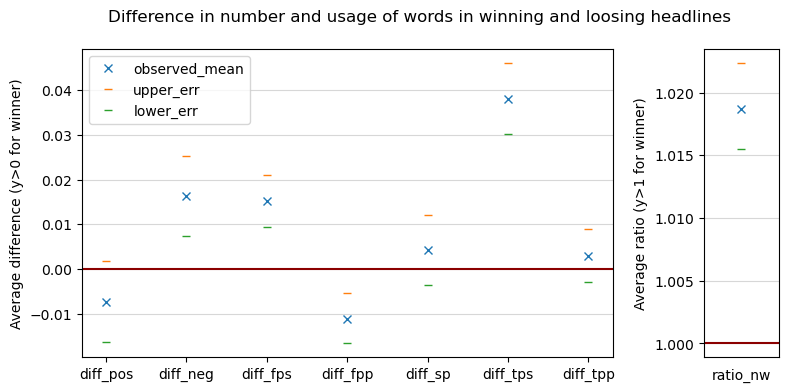

,ratio_nw,diff_pos,diff_neg,diff_fps,diff_fpp,diff_sp,diff_tps,diff_tpp
observed_mean,1.018741,-0.007333,0.016416,0.015175,-0.011057,0.004400,0.037852,0.002990
lower_err,1.015501,-0.016246,0.007446,0.009421,-0.016528,-0.003441,0.030236,-0.002933
upper_err,1.022336,0.001862,0.025159,0.021098,-0.005303,0.012072,0.045862,0.008969


In [19]:
# 3.8

# To observe the effects of the number of words, the use of positive words etc. we compute a confidence interval
# ... for the differences or ratio in the use of number of words etc. in the winner headline vs. the looser headline

# Creating a dataframe to store all of our confidence intervals
df_effects = pd.DataFrame()

# Using previously defined boostrap and ci functions to compute the confidence intervals
# Storing them in the dataframe
df_effects['ratio_nw'] = ci(bootstrap(AB_test['numwords1'],1000, AB_test['numwords2'], 'ratio'))
df_effects['diff_pos'] = ci(bootstrap(AB_test['positive1'],1000, AB_test['positive2'],'diff'))
df_effects['diff_neg'] = ci(bootstrap(AB_test['negative1'],1000, AB_test['negative2'],'diff'))
df_effects['diff_fps'] = ci(bootstrap(AB_test['first_person_singular1'], 1000, AB_test['first_person_singular2'], 'diff'))
df_effects['diff_fpp'] = ci(bootstrap(AB_test['first_person_plural1'],1000, AB_test['first_person_plural2'],'diff'))
df_effects['diff_sp']  = ci(bootstrap(AB_test['second_person1'],1000, AB_test['second_person2'],'diff'))
df_effects['diff_tps'] = ci(bootstrap(AB_test['third_person_singular1'], 1000, AB_test['third_person_singular2'], 'diff'))
df_effects['diff_tpp'] = ci(bootstrap(AB_test['third_person_plural1'],1000, AB_test['third_person_plural2'],'diff'))

# Plotting the results to have a better sens of the effects
# We use 2 subplots, one for the computed ratio and one for the differences
fig, axs = plt.subplots(1,2, figsize=(9,4), gridspec_kw={'wspace':0.3,'width_ratios': [7, 1]})

axs[0].plot(df_effects.T['observed_mean'].drop(['ratio_nw']), 'x', label='observed_mean')
axs[0].plot(df_effects.T['upper_err'].drop(['ratio_nw']), '_', label='upper_err')
axs[0].plot(df_effects.T['lower_err'].drop(['ratio_nw']), '_', label='lower_err')
axs[0].axhline(y=0, color='darkred', linestyle='-')
axs[0].grid(alpha=0.5, axis='y')
axs[0].legend()
axs[0].set(ylabel='Average difference (y>0 for winner)')

axs[1].plot(df_effects.T['observed_mean']['ratio_nw'], 'x', label='observed_mean')
axs[1].plot(df_effects.T['upper_err']['ratio_nw'], '_', label='upper_err')
axs[1].plot(df_effects.T['lower_err']['ratio_nw'], '_', label='lower_err')
axs[1].axhline(y=1, color='darkred', linestyle='-')
axs[1].grid(alpha=0.5, axis='y')
axs[1].set(xlabel='ratio_nw', ylabel='Average ratio (y>1 for winner)')
plt.xticks([])

plt.suptitle('Difference in number and usage of words in winning and loosing headlines')
plt.show()

df_effects # Printing the dataframe as well

___
### 3.9
- todo
___

## Task 4: Temporal validity and heterogeneity of the effect.

Last, we investigate how the effects studied in **T3** change with time and how they might be heterogeneous across different types of news.

4.1 Create a plot where you depict the monthly average number of words in winner and loser headlines. Consider only headlines created after April 2013 (the month of April inclusive). Include also bootstrapped 95% confidence intervals; here, you can use a third-party implementation if you want. Finally, recall that we created a column `date_created` which captures the creation of the winner headline; you can consider this date to correspond to the date of the creation of the A/B test.

4.2 Produce similar plots to each pronoun category, as well as for positive and negative sentiment. Here, unlike in **T4.1**, depict the month averages pooled across winner and loser headlines (i.e., for each month, you calculate the average across both winners and loser headlines).
Create all these plots in a single figure with no more than 11 inches of width and 11 inches of height. Again, consider only headlines created after April 2013 (the month of April inclusive).

4.3 **Discuss:** Has the type of headline Upworthy used in their A/B tests changed with time? Are these changes likely to be producing more or less engaging headlines? Justify.

4.4 Divide your data into two periods, $t_1$, which goes from  April 2013 (inclusive) to March 2014 (inclusive), and $t_2$, which goes from April 2014 (inclusive) to the latest A/B test in the data. Create a dataframe for A/B tests in each period.

4.5 Let's examine if the effects observed remained the same throughout the study period. Use an appropriate methodology  of your choice to determine if the effects observed in **T3.8** (length, each category of pronouns, positive words, and negative words) were different in $t_1$ and $t_2$. Here, note that we are considering "at least one positive outcome" to be the manifestation of an underlying effect, thus significance level must be adjusted down when performing multiple hypothesis tests!

4.6 **Discuss:** Hypothesize two reasons that could have led to a change in the observed effects. According to the analysis done in **T4.5**, have the effects observed remained the same across the study period? 

4.7 The features we are studying may interact with each other. For instance, people may like first person singular pronouns in headlines containing positive words (you are amazing!), but dislike headlines with negative words and first person pronouns (you are awful!). To help answer this question, create:
- a dataframe containing all A/B tests where both winner and loser headlines include a positive word; and
- a dataframe containing all A/B tests where both winner and loser headlines include a negative word;

4.8 Using an appropriate methodology of your choice, determine if the effect of the use of first person singular pronouns in the headline is heterogeneous across headlines with positive words and negative words, i.e., is the effect significantly stronger for one of the dataframes created in **T4.7**? 

4.9 **Discuss:** Considering the analyses you did throughout Tasks 3 and 4, write a short text (no more than 250 words) giving advice to Upworthy employees on how they should try to write engaging headlines. 
You can reference images present in the notebook by indicating a task (e.g., image plotted in **T3.3**) or a cell number. Note that you do not need to conduct any additional analysis to write this text. 


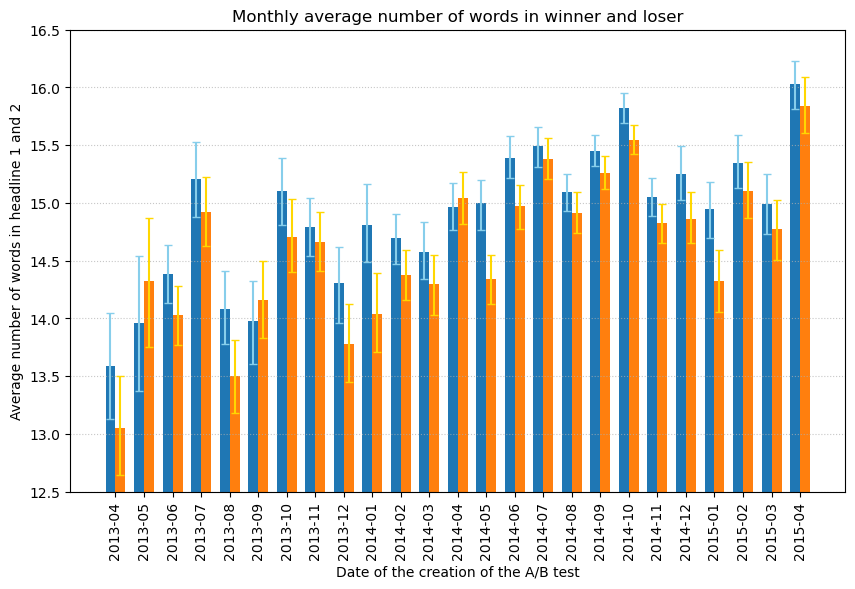

In [21]:
# 4.1

# Creating a new AB_test dataframe to store values from april 2013
AB_test_apr = AB_test.copy()

# Convert the date_created column to a usable datetime column
AB_test_apr["date_created"] = pd.to_datetime(AB_test_apr["date_created"])

# Consider only headlines created after April 2013 and sorting rows chronologically
AB_test_apr = AB_test_apr[AB_test_apr['date_created'] >= pd.Timestamp(2013, 4, 1)]
AB_test_apr.sort_values(by='date_created', inplace=True)

# Creating a new dataframe to store average values per month for numwords and using the previously defined
# ... defined bootstrap function to find the 95% confidence interval for each mean
numwords_avg_per_month = AB_test_apr.groupby(AB_test_apr["date_created"].dt.to_period("M")).apply(lambda x: pd.Series({
        'average_numwords1'  : x['numwords1'].mean(),
        'lower_err_numwords1': ci(bootstrap(x['numwords1'], 1000))[1],
        'upper_err_numwords1': ci(bootstrap(x['numwords1'], 1000))[2],
        'average_numwords2'  : x['numwords2'].mean(),
        'lower_err_numwords2': ci(bootstrap(x['numwords2'], 1000))[1],
        'upper_err_numwords2': ci(bootstrap(x['numwords2'], 1000))[2]
}))

# plot the average number of words in headline 1 and 2 with errorbars
plt.figure(figsize=(10,6))
plt.bar(numwords_avg_per_month.index.strftime('%Y-%m'), numwords_avg_per_month.average_numwords1,
             yerr = [-numwords_avg_per_month.lower_err_numwords1 + numwords_avg_per_month.average_numwords1, 
                    -numwords_avg_per_month.average_numwords1 + numwords_avg_per_month.upper_err_numwords1],
             capsize= 3, ecolor='skyblue', align='edge', width=-0.35)
plt.bar(numwords_avg_per_month.index.strftime('%Y-%m'), numwords_avg_per_month.average_numwords2,
             yerr = [-numwords_avg_per_month.lower_err_numwords2 + numwords_avg_per_month.average_numwords2, 
                    -numwords_avg_per_month.average_numwords2 + numwords_avg_per_month.upper_err_numwords2],
             capsize= 3, ecolor='gold',align='edge', width=0.35)
plt.ylim(12.5,16.5)
plt.xlabel('Date of the creation of the A/B test')
plt.xticks(rotation=90)
plt.ylabel('Average number of words in headline 1 and 2')
plt.title('Monthly average number of words in winner and loser')
plt.grid(alpha=0.7, ls=':', axis='y')
plt.show()

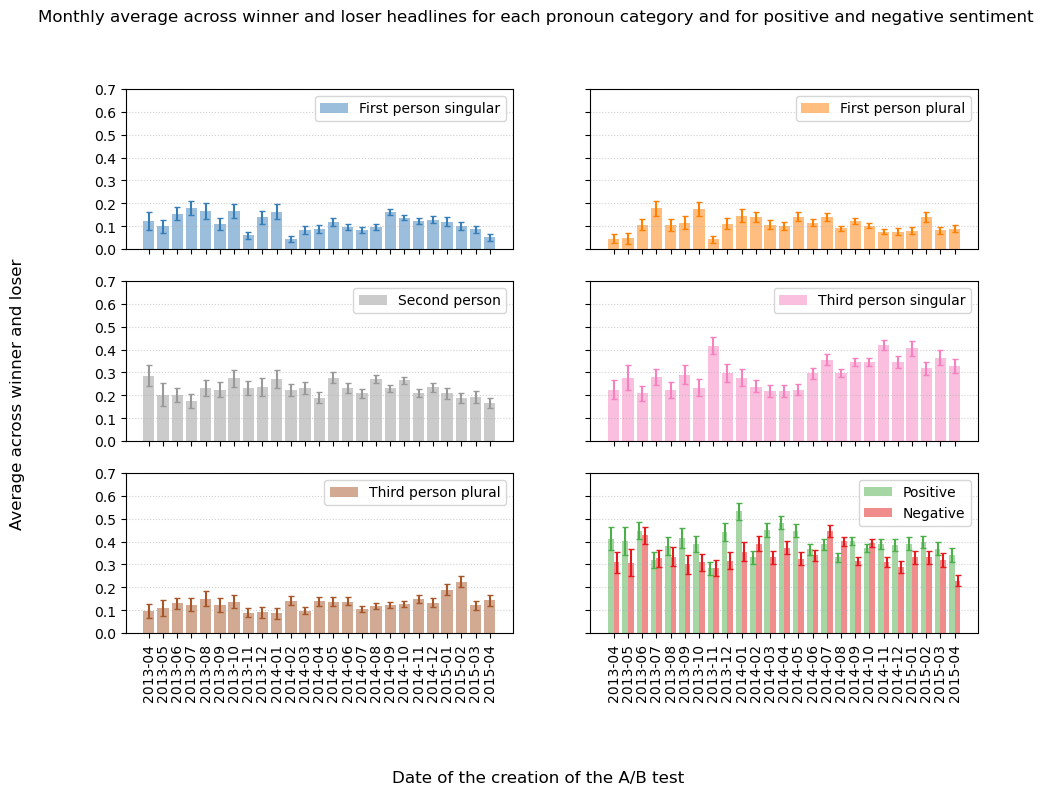

In [22]:
# 4.2

# Repeating the same step as in 4.1 but with personal columns and positive and negative columns
avg = AB_test_apr.groupby(AB_test_apr["date_created"].dt.to_period("M")).apply(lambda x: pd.Series({
        'first_person_singular' : (x[['first_person_singular1','first_person_singular2']].mean(axis=1)).mean(),
        'l_err_fps'             : ci(bootstrap(x[['first_person_singular1','first_person_singular2']].mean(axis=1), 1000))[1],
        'u_err_fps'             : ci(bootstrap(x[['first_person_singular1','first_person_singular2']].mean(axis=1), 1000))[2],
        'first_person_plural'   : (x[['first_person_plural1','first_person_plural2']].mean(axis=1)).mean(),
        'l_err_fpp'             : ci(bootstrap(x[['first_person_plural1','first_person_plural2']].mean(axis=1), 1000))[1],
        'u_err_fpp'             : ci(bootstrap(x[['first_person_plural1','first_person_plural2']].mean(axis=1), 1000))[2],
        'second_person'         : (x[['second_person1','second_person2']].mean(axis=1)).mean(),
        'l_err_sp'              : ci(bootstrap(x[['second_person1','second_person2']].mean(axis=1), 1000))[1],
        'u_err_sp'              : ci(bootstrap(x[['second_person1','second_person2']].mean(axis=1), 1000))[2],
        'third_person_singular' : (x[['third_person_singular1','third_person_singular2']].mean(axis=1)).mean(),
        'l_err_tps'             : ci(bootstrap(x[['third_person_singular1','third_person_singular2']].mean(axis=1), 1000))[1],
        'u_err_tps'             : ci(bootstrap(x[['third_person_singular1','third_person_singular2']].mean(axis=1), 1000))[2],
        'third_person_plural'   : (x[['third_person_plural1','third_person_plural2']].mean(axis=1)).mean(),
        'l_err_tpp'             : ci(bootstrap(x[['third_person_plural1','third_person_plural2']].mean(axis=1), 1000))[1],
        'u_err_tpp'             : ci(bootstrap(x[['third_person_plural1','third_person_plural2']].mean(axis=1), 1000))[2],
        'positive'              : (x[['positive1','positive2']].mean(axis=1)).mean(),
        'l_err_pos'             : ci(bootstrap(x[['positive1','positive2']].mean(axis=1), 1000))[1],
        'u_err_pos'             : ci(bootstrap(x[['positive1','positive2']].mean(axis=1), 1000))[2],
        'negative'              : (x[['negative1','negative2']].mean(axis=1)).mean(),
        'l_err_neg'             : ci(bootstrap(x[['negative1','negative2']].mean(axis=1), 1000))[1],
        'u_err_neg'             : ci(bootstrap(x[['negative1','negative2']].mean(axis=1), 1000))[2]
}))

##################################################################################
#                                      PLOT                                      #
##################################################################################

# Using a colorblind palette
colorblind = ['#377eb8', '#ff7f00', '#4daf4a',
              '#f781bf', '#a65628', '#984ea3',
              '#999999', '#e41a1c', '#dede00']

# Plotting 6 subplots
fig, axs = plt.subplots(3,2,figsize= (11,8), sharey=True, sharex=True)

# First person singular
axs[0, 0].grid(alpha=0.6, ls=':', axis='y')
axs[0, 0].bar(avg.index.strftime('%Y-%m'), avg.first_person_singular,
              yerr=[-avg.l_err_fps + avg.first_person_singular, -avg.first_person_singular + avg.u_err_fps],
              capsize=2, ecolor=colorblind[0], color=colorblind[0], alpha=0.5, label='First person singular')
axs[0, 0].legend()

# First person plural
axs[0, 1].grid(alpha=0.6, ls=':', axis='y')
axs[0, 1].bar(avg.index.strftime('%Y-%m'), avg.first_person_plural,
              yerr=[-avg.l_err_fpp + avg.first_person_plural, -avg.first_person_plural + avg.u_err_fpp],
              capsize=2, ecolor=colorblind[1], color=colorblind[1], alpha=0.5, label='First person plural')
axs[0, 1].legend()

# Second person
axs[1, 0].grid(alpha=0.6, ls=':', axis='y')
axs[1, 0].bar(avg.index.strftime('%Y-%m'), avg.second_person,
              yerr=[-avg.l_err_sp + avg.second_person, -avg.second_person + avg.u_err_sp],
              capsize=2, ecolor=colorblind[6], color=colorblind[6], alpha=0.5, label='Second person')
axs[1, 0].legend()

# Third person singular
axs[1, 1].grid(alpha=0.6, ls=':', axis='y')
axs[1, 1].bar(avg.index.strftime('%Y-%m'), avg.third_person_singular,
              yerr=[-avg.l_err_tps + avg.third_person_singular, -avg.third_person_singular + avg.u_err_tps],
              capsize=2, ecolor=colorblind[3], color=colorblind[3], alpha=0.5, label='Third person singular')
axs[1, 1].legend()

# Third person plural
axs[2, 0].grid(alpha=0.6, ls=':', axis='y')
axs[2, 0].bar(avg.index.strftime('%Y-%m'), avg.third_person_plural,
              yerr=[-avg.l_err_tpp + avg.third_person_plural, -avg.third_person_plural + avg.u_err_tpp],
              capsize=2, ecolor=colorblind[4], color=colorblind[4], alpha=0.5, label='Third person plural')
axs[2, 0].legend()

# Positive vs. Negative
axs[2, 1].grid(alpha=0.6, ls=':', axis='y')
axs[2, 1].bar(avg.index.strftime('%Y-%m'), avg.positive,
              yerr=[-avg.l_err_pos + avg.positive, -avg.positive + avg.u_err_pos],
              capsize=2, ecolor=colorblind[2], align='edge', width=-0.4, color=colorblind[2], alpha=0.5, label='Positive')
axs[2, 1].bar(avg.index.strftime('%Y-%m'), avg.negative,
              yerr=[-avg.l_err_neg + avg.negative, -avg.negative + avg.u_err_neg],
              capsize=2, ecolor=colorblind[7], align='edge', width=0.4, color=colorblind[7], alpha=0.5, label='Negative')
axs[2, 1].legend()

# Setting titles, labels and yticks
fig.autofmt_xdate(rotation=90, ha='center')
fig.suptitle('Monthly average across winner and loser headlines for each pronoun category and for positive and negative sentiment ')
fig.supylabel('Average across winner and loser')
fig.supxlabel('Date of the creation of the A/B test')
plt.yticks(np.arange(0,0.8,0.1))

# Show
plt.show()

In [23]:
# 4.4

# Splitting the AB_test in two periods to compare the effects over time
period1 = AB_test_apr[(AB_test_apr.date_created >= pd.Timestamp(2013, 4, 1))& (AB_test_apr.date_created< pd.Timestamp(2014, 4, 1))]
period2 = AB_test_apr[AB_test_apr.date_created >= pd.Timestamp(2014, 4, 1)]

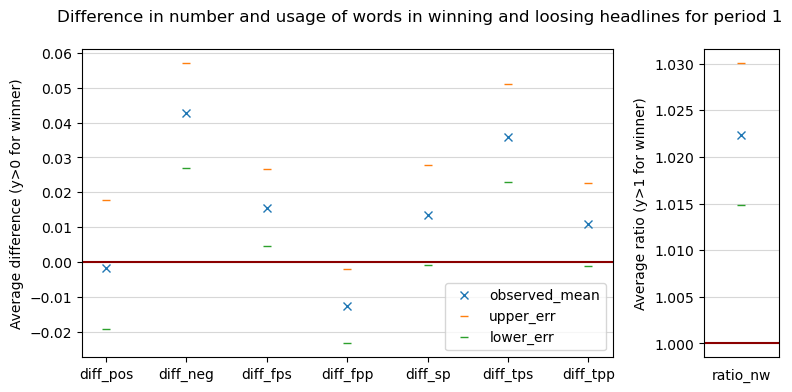

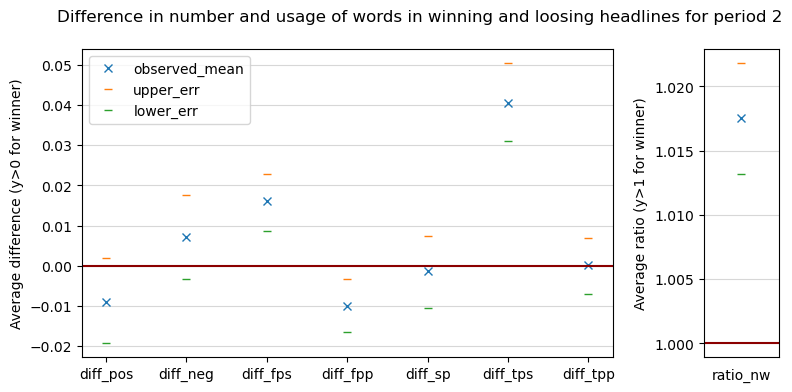

We can already observe a important change in the effect of negative words over the winning headline. We see that for period 1, the effect is more important than for period 2, meaning negative words were more used in winning headlines for the first period than for the second.


In [24]:
# 4.5

# 4.5 is a long question is splitted it in three parts
# The first part compute the effects over period 1 and period 2 separately
# The second part compute the difference of the effects using bootstrapping and CI
# The third part compute the difference of the effects using a independant ttest

### Part 1 : computing the effects over period 1 and period 2 separately ###

# We repeat the same procedure as in 3.8 but over period 1 and plot the results
df_effects_p1 = pd.DataFrame()
df_effects_p1['ratio_nw'] = ci(bootstrap(period1['numwords1'],1000, period1['numwords2'], 'ratio'))
df_effects_p1['diff_pos'] = ci(bootstrap(period1['positive1'],1000, period1['positive2'],'diff'))
df_effects_p1['diff_neg'] = ci(bootstrap(period1['negative1'],1000, period1['negative2'],'diff'))
df_effects_p1['diff_fps'] = ci(bootstrap(period1['first_person_singular1'], 1000, period1['first_person_singular2'], 'diff'))
df_effects_p1['diff_fpp'] = ci(bootstrap(period1['first_person_plural1'],1000, period1['first_person_plural2'],'diff'))
df_effects_p1['diff_sp']  = ci(bootstrap(period1['second_person1'],1000, period1['second_person2'],'diff'))
df_effects_p1['diff_tps'] = ci(bootstrap(period1['third_person_singular1'], 1000, period1['third_person_singular2'], 'diff'))
df_effects_p1['diff_tpp'] = ci(bootstrap(period1['third_person_plural1'],1000, period1['third_person_plural2'],'diff'))

# Plot period 1 effects
fig, axs = plt.subplots(1,2, figsize=(9,4), gridspec_kw={'wspace':0.3,'width_ratios': [7, 1]})

axs[0].plot(df_effects_p1.T['observed_mean'].drop(['ratio_nw']), 'x', label='observed_mean')
axs[0].plot(df_effects_p1.T['upper_err'].drop(['ratio_nw']), '_', label='upper_err')
axs[0].plot(df_effects_p1.T['lower_err'].drop(['ratio_nw']), '_', label='lower_err')
axs[0].axhline(y=0, color='darkred', linestyle='-')
axs[0].grid(alpha=0.5, axis='y')
axs[0].legend()
axs[0].set(ylabel='Average difference (y>0 for winner)')

axs[1].plot(df_effects_p1.T['observed_mean']['ratio_nw'], 'x', label='observed_mean')
axs[1].plot(df_effects_p1.T['upper_err']['ratio_nw'], '_', label='upper_err')
axs[1].plot(df_effects_p1.T['lower_err']['ratio_nw'], '_', label='lower_err')
axs[1].axhline(y=1, color='darkred', linestyle='-')
axs[1].grid(alpha=0.5, axis='y')
axs[1].set(xlabel='ratio_nw', ylabel='Average ratio (y>1 for winner)')
plt.xticks([])

plt.suptitle('Difference in number and usage of words in winning and loosing headlines for period 1')
plt.show()

# We repeat the same procedure but for period 2
df_effects_p2 = pd.DataFrame()
df_effects_p2['ratio_nw'] = ci(bootstrap(period2['numwords1'],1000, period2['numwords2'], 'ratio'))
df_effects_p2['diff_pos'] = ci(bootstrap(period2['positive1'],1000, period2['positive2'],'diff'))
df_effects_p2['diff_neg'] = ci(bootstrap(period2['negative1'],1000, period2['negative2'],'diff'))
df_effects_p2['diff_fps'] = ci(bootstrap(period2['first_person_singular1'], 1000, period2['first_person_singular2'], 'diff'))
df_effects_p2['diff_fpp'] = ci(bootstrap(period2['first_person_plural1'],1000, period2['first_person_plural2'],'diff'))
df_effects_p2['diff_sp']  = ci(bootstrap(period2['second_person1'],1000, period2['second_person2'],'diff'))
df_effects_p2['diff_tps'] = ci(bootstrap(period2['third_person_singular1'], 1000, period2['third_person_singular2'], 'diff'))
df_effects_p2['diff_tpp'] = ci(bootstrap(period2['third_person_plural1'],1000, period2['third_person_plural2'],'diff'))

# Plot period 2 effects
fig, axs = plt.subplots(1,2, figsize=(9,4), gridspec_kw={'wspace':0.3,'width_ratios': [7, 1]})

axs[0].plot(df_effects_p2.T['observed_mean'].drop(['ratio_nw']), 'x', label='observed_mean')
axs[0].plot(df_effects_p2.T['upper_err'].drop(['ratio_nw']), '_', label='upper_err')
axs[0].plot(df_effects_p2.T['lower_err'].drop(['ratio_nw']), '_', label='lower_err')
axs[0].axhline(y=0, color='darkred', linestyle='-')
axs[0].grid(alpha=0.5, axis='y')
axs[0].legend()
axs[0].set(ylabel='Average difference (y>0 for winner)')

axs[1].plot(df_effects_p2.T['observed_mean']['ratio_nw'], 'x', label='observed_mean')
axs[1].plot(df_effects_p2.T['upper_err']['ratio_nw'], '_', label='upper_err')
axs[1].plot(df_effects_p2.T['lower_err']['ratio_nw'], '_', label='lower_err')
axs[1].axhline(y=1, color='darkred', linestyle='-')
axs[1].grid(alpha=0.5, axis='y')
axs[1].set(xlabel='ratio_nw', ylabel='Average ratio (y>1 for winner)')
plt.xticks([])

plt.suptitle('Difference in number and usage of words in winning and loosing headlines for period 2')
plt.show()

print("We can already observe a important change in the effect of negative words over the winning headline. \
We see that for period 1, the effect is more important than for period 2, meaning negative words were more used in \
winning headlines for the first period than for the second.")

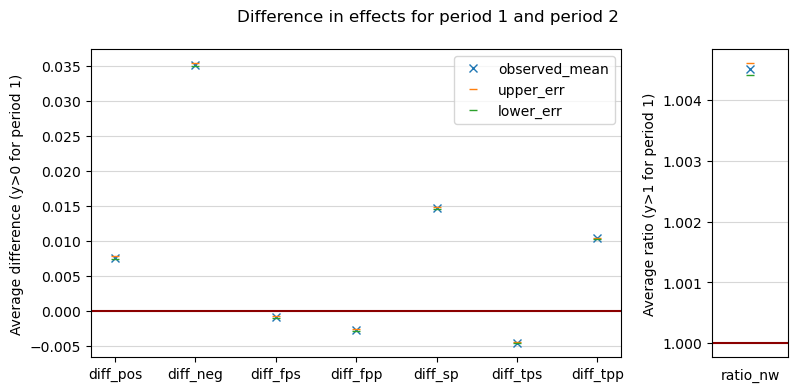

As for part 1, we observe a important change in the effect of usage of negative words on the winning headline.The plot shows us that the usage of negative words had more effect on the winning headline for the first period than for the second. We might expect a low p-value for the ttests.


,ratio_nw,diff_pos,diff_neg,diff_fps,diff_fpp,diff_sp,diff_tps,diff_tpp
observed_mean,1.004498,0.007639,0.035225,-0.000828,-0.002668,0.014767,-0.004520,0.010376
lower_err,1.004404,0.007440,0.035050,-0.000962,-0.002798,0.014623,-0.004648,0.010258
upper_err,1.004594,0.007830,0.035416,-0.000706,-0.002542,0.014910,-0.004390,0.010506


In [27]:
# 4.5

### Part 2 : comparing the effects using a bootstrapping method ###

# TWe can bootstrap the effects for the periods separately, then, before computing a confidence
# ... interval, we can bootstrap the differences of the obtained list of means to see if there are
# ... major differences in effects between the first and the second period

# Creating a dataframe to compare the effects over period 1 and 2
df_compare_effects = pd.DataFrame()

# Bootstrapping the ratio of number of words used for winning headlines over loosing headlines, 
# ... for period 1 and 2 separately, then bootstrapping the 'ratio of ratios' of period 1 over period 2
_, bootstrap_nw1  = bootstrap(period1['numwords1'],1000, period1['numwords2'],'ratio')
_, bootstrap_nw2  = bootstrap(period2['numwords1'],1000, period2['numwords2'],'ratio')
df_compare_effects['ratio_nw'] = ci(bootstrap(bootstrap_nw1,1000, bootstrap_nw2,'ratio'))

# Bootstrapping the difference of positive sentiment used for winning headlines vs. loosing headlines, 
# ... for period 1 and 2 separately, then bootstrapping the 'difference of differences' of period 1 vs. period 2
_, bootstrap_pos1 = bootstrap(period1['positive1'],1000, period1['positive2'],'diff')
_, bootstrap_pos2 = bootstrap(period2['positive1'],1000, period2['positive2'],'diff')
df_compare_effects['diff_pos'] = ci(bootstrap(bootstrap_pos1,1000, bootstrap_pos2,'diff'))

# Same for negative sentiments
_, bootstrap_neg1 = bootstrap(period1['negative1'],1000, period1['negative2'],'diff')
_, bootstrap_neg2 = bootstrap(period2['negative1'],1000, period2['negative2'],'diff')
df_compare_effects['diff_neg'] = ci(bootstrap(bootstrap_neg1,1000, bootstrap_neg2,'diff'))

# First person singular
_, bootstrap_fps1 = bootstrap(period1['first_person_singular1'],1000, period1['first_person_singular2'],'diff')
_, bootstrap_fps2 = bootstrap(period2['first_person_singular1'],1000, period2['first_person_singular2'],'diff')
df_compare_effects['diff_fps'] = ci(bootstrap(bootstrap_fps1,1000, bootstrap_fps2,'diff'))

# First person plural
_, bootstrap_fpp1 = bootstrap(period1['first_person_plural1'],1000, period1['first_person_plural2'],'diff')
_, bootstrap_fpp2 = bootstrap(period2['first_person_plural1'],1000, period2['first_person_plural2'],'diff')
df_compare_effects['diff_fpp'] = ci(bootstrap(bootstrap_fpp1,1000, bootstrap_fpp2,'diff'))

# Second person
_, bootstrap_sp1  = bootstrap(period1['second_person1'],1000, period1['second_person2'],'diff')
_, bootstrap_sp2  = bootstrap(period2['second_person1'],1000, period2['second_person2'],'diff')
df_compare_effects['diff_sp']  = ci(bootstrap(bootstrap_sp1,1000, bootstrap_sp2,'diff'))

# Third person singular
_, bootstrap_tps1 = bootstrap(period1['third_person_singular1'],1000, period1['third_person_singular2'],'diff')
_, bootstrap_tps2 = bootstrap(period2['third_person_singular1'],1000, period2['third_person_singular2'],'diff')
df_compare_effects['diff_tps'] = ci(bootstrap(bootstrap_tps1,1000, bootstrap_tps2,'diff'))

# Third person plural
_, bootstrap_tpp1 = bootstrap(period1['third_person_plural1'],1000, period1['third_person_plural2'],'diff')
_, bootstrap_tpp2 = bootstrap(period2['third_person_plural1'],1000, period2['third_person_plural2'],'diff')
df_compare_effects['diff_tpp'] = ci(bootstrap(bootstrap_tpp1,1000, bootstrap_tpp2,'diff'))

# Plot the changes in effects over period 1 and 2
fig, axs = plt.subplots(1,2, figsize=(9,4), gridspec_kw={'wspace':0.3,'width_ratios': [7, 1]})

axs[0].plot(df_compare_effects.T['observed_mean'].drop(['ratio_nw']), 'x', label='observed_mean')
axs[0].plot(df_compare_effects.T['upper_err'].drop(['ratio_nw']), '_', label='upper_err')
axs[0].plot(df_compare_effects.T['lower_err'].drop(['ratio_nw']), '_', label='lower_err')
axs[0].axhline(y=0, color='darkred', linestyle='-')
axs[0].grid(alpha=0.5, axis='y')
axs[0].legend()
axs[0].set(ylabel='Average difference (y>0 for period 1)')

axs[1].plot(df_compare_effects.T['observed_mean']['ratio_nw'], 'x', label='observed_mean')
axs[1].plot(df_compare_effects.T['upper_err']['ratio_nw'], '_', label='upper_err')
axs[1].plot(df_compare_effects.T['lower_err']['ratio_nw'], '_', label='lower_err')
axs[1].axhline(y=1, color='darkred', linestyle='-')
axs[1].grid(alpha=0.5, axis='y')
axs[1].set(xlabel='ratio_nw', ylabel='Average ratio (y>1 for period 1)')
plt.xticks([])

plt.suptitle('Difference in effects for period 1 and period 2')
plt.show()

print('As for part 1, we observe a important change in the effect of usage of negative words on the winning headline.\
The plot shows us that the usage of negative words had more effect on the winning headline for the first period than \
for the second. We might expect a low p-value for the ttests.')

df_compare_effects # Printing the datafram (less visible)

In [28]:
# 4.5

### Part 3 : comparing the effects over time using t-tests ###

# We compute the differences (or ratio) in the usage of words/sentimennts over period 1 and period 2 separately
# ... then we use the pingouin library (that returns more informations than scipy for the t-tests) to compute
# ... t-tests over period 1 and 2. We are looking for small enough p_values
# We set alpha = 5%/8 (as there is 8 features) for the p-value. If a p-value is lower than alpha for one the the
# ... feature, we will reject the null hypothesis (null: the effects are the same for p1 and p2)

# Computing ratios and differences of winning vs. loosing headlines' features for period 1
p1_ratio_nw = period1['numwords1'] / period1['numwords2']
p1_diff_pos = period1['positive1'] - period1['positive2']
p1_diff_neg = period1['negative1'] - period1['negative2']
p1_diff_fps = period1['first_person_singular1'] - period1['first_person_singular2']
p1_diff_fpp = period1['first_person_plural1'] - period1['first_person_plural2']
p1_diff_sp  = period1['second_person1'] - period1['second_person2']
p1_diff_tps = period1['third_person_singular1'] - period1['third_person_singular2']
p1_diff_tpp = period1['third_person_plural1'] - period1['third_person_plural2']

# Computing ratios and differences of winning vs. loosing headlines' features for period 2
p2_ratio_nw = period2['numwords1'] / period2['numwords2']
p2_diff_pos = period2['positive1'] - period2['positive2']
p2_diff_neg = period2['negative1'] - period2['negative2']
p2_diff_fps = period2['first_person_singular1'] - period2['first_person_singular2']
p2_diff_fpp = period2['first_person_plural1'] - period2['first_person_plural2']
p2_diff_sp  = period2['second_person1'] - period2['second_person2']
p2_diff_tps = period2['third_person_singular1'] - period2['third_person_singular2']
p2_diff_tpp = period2['third_person_plural1'] - period2['third_person_plural2']

# Creating a dataframe to store the results of our t-tests
df_ttest = pd.DataFrame()

# Computing t-tests comparing the differences (or ratios) over period 1 and 2
df_ttest['ratio_numwords'] = pg.ttest(p1_ratio_nw, p2_ratio_nw, paired=False, alternative='two-sided', confidence=0.95).loc['T-test']
df_ttest['diff_positive']  = pg.ttest(p1_diff_pos, p2_diff_pos, paired=False, alternative='two-sided', confidence=0.95).loc['T-test']
df_ttest['diff_negative']  = pg.ttest(p1_diff_neg, p2_diff_neg, paired=False, alternative='two-sided', confidence=0.95).loc['T-test']
df_ttest['diff_fps']       = pg.ttest(p1_diff_fps, p2_diff_fps, paired=False, alternative='two-sided', confidence=0.95).loc['T-test']
df_ttest['diff_fpp']       = pg.ttest(p1_diff_fpp, p2_diff_fpp, paired=False, alternative='two-sided', confidence=0.95).loc['T-test']
df_ttest['diff_sp']        = pg.ttest(p1_diff_sp,  p2_diff_sp,  paired=False, alternative='two-sided', confidence=0.95).loc['T-test']
df_ttest['diff_tps']       = pg.ttest(p1_diff_tps, p2_diff_tps, paired=False, alternative='two-sided', confidence=0.95).loc['T-test']
df_ttest['diff_tpp']       = pg.ttest(p1_diff_tpp, p2_diff_tpp, paired=False, alternative='two-sided', confidence=0.95).loc['T-test']
df_ttest = df_ttest.T

print("Below is a list of parameters having a significant different effect during period 1 and 2 as the p-value is \
lower than 0.01 : \n", df_ttest[df_ttest['p-val'] < 0.05/8]['p-val'])
print("As expected, the t-test for negative sentiment has a low p-value (lower than alpha) underlying a change \
in the effect of negative words' usage for period 1 and period 2.")

df_ttest # Print the t-tests results 

Below is a list of parameters having a significant different effect during period 1 and 2 as the p-value is lower than 0.01 : 
 diff_negative    0.000189
Name: p-val, dtype: object
As expected, the t-test for negative sentiment has a low p-value (lower than alpha) underlying a change in the effect of negative words' usage for period 1 and period 2.


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
ratio_numwords,1.453901,7877.959882,two-sided,0.146014,"[-0.0, 0.02]",0.025629,0.055,0.324025
diff_positive,0.696444,8591.649748,two-sided,0.486169,"[-0.01, 0.03]",0.011722,0.025,0.105629
diff_negative,3.735372,8883.16357,two-sided,0.000189,"[0.02, 0.05]",0.061831,20.39,0.952094
diff_fps,-0.087735,8904.751849,two-sided,0.93009,"[-0.01, 0.01]",0.001451,0.019,0.050829
diff_fpp,-0.406872,8438.639577,two-sided,0.684112,"[-0.02, 0.01]",0.006912,0.021,0.069018
diff_sp,1.734811,8893.081971,two-sided,0.082809,"[-0.0, 0.03]",0.0287,0.086,0.390979
diff_tps,-0.52015,9170.520337,two-sided,0.602972,"[-0.02, 0.01]",0.008478,0.022,0.078759
diff_tpp,1.580796,9091.161623,two-sided,0.113959,"[-0.0, 0.02]",0.025874,0.067,0.329191


In [29]:
# 4.7

# Creating two sub AB_test with only positive sentiments and negative sentiments for headline 1 and 2
positive = AB_test_apr[(AB_test_apr.positive1== 1)&(AB_test_apr.positive2== 1)]
negative = AB_test_apr[(AB_test_apr.negative1== 1)&(AB_test_apr.negative2== 1)]

--- Part 1 ---
The p-value for the positive dataset is 0.0299 < 0.05
The p-value for the negative dataset is 0.5494 > 0.05

We can reject the null hypothesis for positive headlines, meaning there is an effect of the usage of the first persone singular on positive headlines. However, we cannot reject the null hypothesis for the negative headlines.
However this tells us nothing on the heterogeneity of the effect for positive and negative headlines, as we didn't compare these sets yet. 


--- Part 2 ---


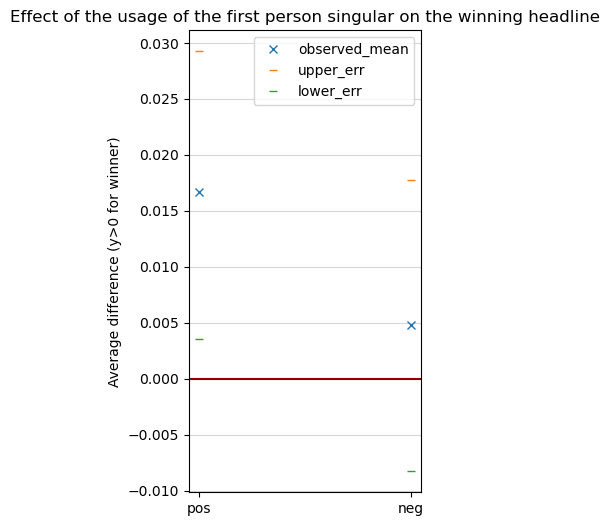

Here again, we can see the usage of the first person singular has an effect on the winning headline for positive headlines, but using a 95% interval, we cannot say the effect is much stronger on positive headlines than for negative ones.


In [30]:
#4.8

print('--- Part 1 ---')
# In a first part, we will use the t-test method to compare, for each positive and negative sets
# ... the usage of first person singular for the winning vs. loosing headlines 
# For example, if a headline is positive, does the usage of the first person singular boosts the clickthrough rate ?
test_positive = pg.ttest(positive['first_person_singular1'],positive['first_person_singular2'], paired=False)
test_negative = pg.ttest(negative['first_person_singular1'],negative['first_person_singular2'], paired=False)

print("The p-value for the positive dataset is %s < 0.05" %round(test_positive['p-val']['T-test'],4))
print("The p-value for the negative dataset is %s > 0.05" %round(test_negative['p-val']['T-test'],4))
print("\nWe can reject the null hypothesis for positive headlines, meaning there is an effect of the usage of the first \
persone singular on positive headlines. However, we cannot reject the null hypothesis for the negative headlines.")
print("However this tells us nothing on the heterogeneity of the effect for positive and negative headlines, as we didn't \
compare these sets yet. \n\n")


print('--- Part 2 ---')
# In a second part we can compute the confidence interval using a bootstrapping method to compare the effects
# ... of the usage of the first person singular of positive and negative headlines 
df_compare_fps_on_pos_neg = pd.DataFrame()
df_compare_fps_on_pos_neg['pos'] = ci(bootstrap(positive['first_person_singular1'],1000, positive['first_person_singular2'],'diff'))
df_compare_fps_on_pos_neg['neg'] = ci(bootstrap(negative['first_person_singular1'],1000, negative['first_person_singular2'],'diff'))
df_compare_fps_on_pos_neg

# Plot to compare more easily the effects on positive and negatiive headlines
plt.figure(figsize=(3,6))
plt.plot(df_compare_fps_on_pos_neg.T['observed_mean'], 'x', label='observed_mean')
plt.plot(df_compare_fps_on_pos_neg.T['upper_err'], '_', label='upper_err')
plt.plot(df_compare_fps_on_pos_neg.T['lower_err'], '_', label='lower_err')
plt.axhline(y=0, color='darkred', linestyle='-')
plt.grid(alpha=0.5, axis='y')
plt.legend()
plt.ylabel('Average difference (y>0 for winner)')
plt.title('Effect of the usage of the first person singular on the winning headline')
plt.show()

print('Here again, we can see the usage of the first person singular has an effect on the winning headline for positive \
headlines, but using a 95% interval, we cannot say the effect is much stronger on positive headlines than for negative ones.')